In [1]:
#Dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def resize_keep_aspect(img, size=800):
    old_height, old_width = img.shape[:2]
    if img.shape[0] >= size:
        aspect_ratio = size / float(old_height)
        dim = (int(old_width * aspect_ratio), size)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LANCZOS4)
    elif img.shape[1] >= size:
        aspect_ratio = size / float(old_width)
        dim = (size, int(old_height * aspect_ratio))
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LANCZOS4)
    return img

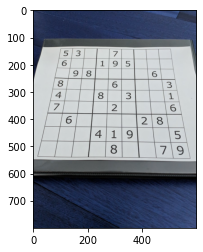

In [3]:
#Loading Test Image
test_image  = cv2.imread('test_image.jpg')
test_image = resize_keep_aspect(test_image)
plt.imshow(test_image)

In [4]:
def process_image(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(5,5),1)
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    return img

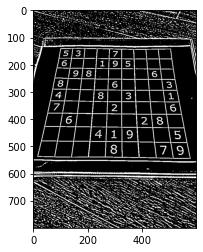

In [5]:
processed_image = process_image(test_image)
plt.imshow(processed_image, cmap='gray')

In [6]:
def sudoku_contour(img):
    contours, hirarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    return contours

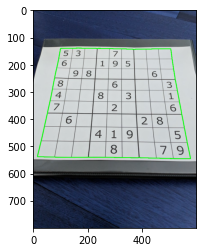

In [7]:
contour = sudoku_contour(processed_image)
cv2.drawContours(test_image, contour, 0, (0, 255, 0), 2)
plt.imshow(test_image)


In [8]:
largest_contour = np.squeeze(contour[0])
sums = [sum(i) for i in largest_contour]
differences = [i[0] - i[1] for i in largest_contour]

top_left = np.argmin(sums)
top_right = np.argmax(differences)
bottom_left = np.argmax(sums)
bottom_right = np.argmin(differences)

corners = [largest_contour[top_left], largest_contour[top_right], largest_contour[bottom_left], largest_contour[bottom_right]]

In [9]:
(tl, tr, br, bl) = corners
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
dst = np.array([[0, 0], [maxWidth - 1, 0], [maxWidth - 1, maxHeight - 1], [0, maxHeight - 1]], dtype = "float32")
M = cv2.getPerspectiveTransform(np.float32(corners), dst)
warped_image = cv2.warpPerspective(processed_image, M, (maxWidth, maxHeight))

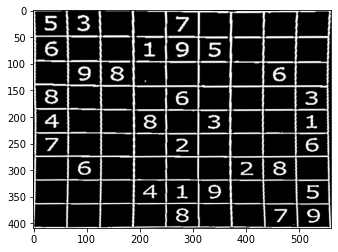

In [10]:
plt.imshow(warped_image,cmap='gray')

In [11]:
def get_grid_lines(img, length=12):
    horizontal = np.copy(img)
    cols = horizontal.shape[1]
    horizontal_size = cols // length
    horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    horizontal = cv2.erode(horizontal, horizontal_structure)
    horizontal = cv2.dilate(horizontal, horizontal_structure)

    vertical = np.copy(img)
    rows = vertical.shape[0]
    vertical_size = rows // length
    vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
    vertical = cv2.erode(vertical, vertical_structure)
    vertical = cv2.dilate(vertical, vertical_structure)

    return vertical, horizontal

In [ ]:
v,h = get_grid_lines(warped_image)
print(v,h)